In [5]:
!pip freeze | grep qiskit

qiskit==1.3.1
qiskit-aer==0.16.0
qiskit-algorithms==0.3.1
qiskit-experiments==0.8.1
qiskit-ibm-experiment==0.4.8
qiskit-ibm-provider==0.11.0
qiskit-ibm-runtime==0.34.0
qiskit-machine-learning==0.8.2


In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

service = QiskitRuntimeService(channel="local")

In [2]:
q_reg, c_reg = QuantumRegister(3), ClassicalRegister(3)
q_ckt = QuantumCircuit(q_reg, c_reg)

#State preparation
q_ckt.h(q_reg[0])
q_ckt.barrier()

#Bell state preparation
q_ckt.h(q_reg[1])
q_ckt.cx(q_reg[1], q_reg[2])
q_ckt.barrier()

#Alice's interaction
q_ckt.cx(q_reg[0], q_reg[1])
q_ckt.h(q_reg[0])
q_ckt.barrier()

#Alice's measurement
q_ckt.measure(q_reg[0], c_reg[0])
q_ckt.measure(q_reg[1], c_reg[1])
q_ckt.barrier()

#Bob's operation
q_ckt.z(q_reg[2]).c_if(c_reg[0], 1)
q_ckt.x(q_reg[2]).c_if(c_reg[1], 1)
q_ckt.barrier()

#Verification of state received
q_ckt.measure(q_reg[2], c_reg[2])
q_ckt.draw()

/var/folders/mt/y75db3512zv_8r60rn4pb82h0000gn/T/ipykernel_79994/2104196639.py:24: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  q_ckt.z(q_reg[2]).c_if(c_reg[0], 1)
/var/folders/mt/y75db3512zv_8r60rn4pb82h0000gn/T/ipykernel_79994/2104196639.py:25: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  q_ckt.x(q_reg[2]).c_if(c_reg[1], 1)


┌───┐ ░            ░      ┌───┐ ░ ┌─┐    ░                          ░    
q1_0: ┤ H ├─░────────────░───■──┤ H ├─░─┤M├────░──────────────────────────░────
      └───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░                          ░    
q1_1: ──────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░──────────────────────────░────
            ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░    ┌───┐       ┌───┐     ░ ┌─┐
q1_2: ──────░──────┤ X ├─░────────────░──╫──╫──░────┤ Z ├───────┤ X ├─────░─┤M├
            ░      └───┘ ░            ░  ║  ║  ░    └─╥─┘       └─╥─┘     ░ └╥┘
                                         ║  ║    ┌────╨─────┐┌────╨─────┐    ║ 
c0: 3/═══════════════════════════════════╩══╩════╡ c0_0=0x1 ╞╡ c0_1=0x1 ╞════╩═
                                         0  1    └──────────┘└──────────┘    2

In [3]:
sim = AerSimulator()
result = sim.run(q_ckt, backend=sim, shots=100, memory=True).result()

(array([56., 44.]), array([0. , 0.5, 1. ]), <BarContainer object of 2 artists>)

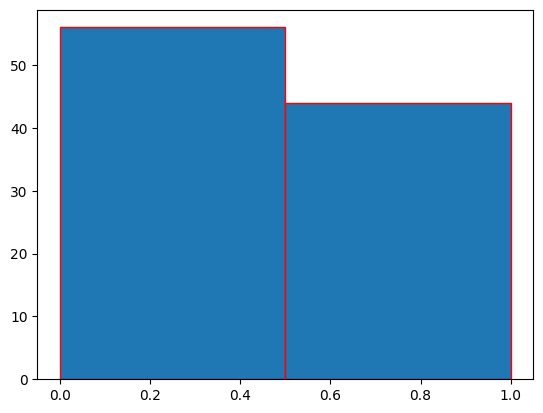

In [4]:
r=[]
for i in range(100):
  r.append(int(result.get_memory()[i][2]))

plt.hist(r, bins=2, edgecolor='r')